In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'], axis=1)
X.shape

(1000, 7)

In [5]:
y = df['math_score']

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [8]:
#Create column Transformer
num_features = X.select_dtypes(exclude="object").columns
print(num_features)
cat_features = X.select_dtypes(include="object").columns
print(cat_features)


Index(['reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [9]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]

)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

In [16]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mse, r2_square

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mse, model_train_r2_square = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_r2_square = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Model performance for Training set")
    print("MSE : {:.4f}".format(model_train_mse))
    print("R2 Score : {:.4f}".format(model_train_r2_square))

    print('\n')

    print("Model performance for Test set")
    print("MSE : {:.4f}".format(model_train_mse))
    print("R2 Score : {:.4f}".format(model_train_r2_square))

    print('--------------------------------------------------')


    r2_list.append(model_test_r2_square)

LinearRegression
Model performance for Training set
MSE : 28.3349
R2 Score : 0.8743


Model performance for Test set
MSE : 28.3349
R2 Score : 0.8743
--------------------------------------------------
Lasso
Model performance for Training set
MSE : 43.4784
R2 Score : 0.8071


Model performance for Test set
MSE : 43.4784
R2 Score : 0.8071
--------------------------------------------------
Ridge
Model performance for Training set
MSE : 28.3378
R2 Score : 0.8743


Model performance for Test set
MSE : 28.3378
R2 Score : 0.8743
--------------------------------------------------
K-Neighbors Regressor
Model performance for Training set
MSE : 32.5776
R2 Score : 0.8555


Model performance for Test set
MSE : 32.5776
R2 Score : 0.8555
--------------------------------------------------
Decision Tree
Model performance for Training set
MSE : 0.0781
R2 Score : 0.9997


Model performance for Test set
MSE : 0.0781
R2 Score : 0.9997
--------------------------------------------------
Random Forest Regresso

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851080
8,AdaBoostRegressor,0.848044
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.727581


In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

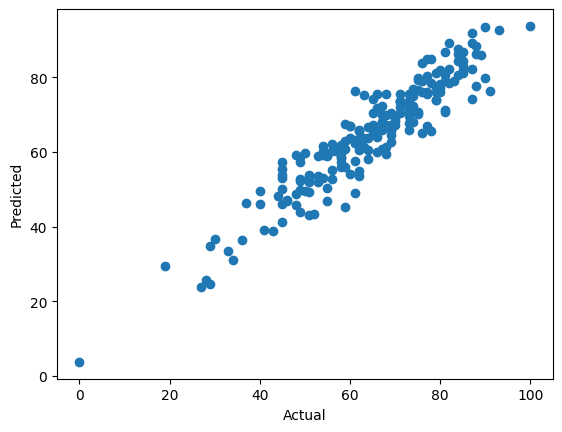

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')